In [1]:
### Importing libraries ###

import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [2]:
### Importing ZE1990 data ###

dUC_timeseries_ZE1990 = pd.read_json("../0) Data processing/Output/dUC_timeseries_ZE1990.json")
d1_timeseries_ZE1990 = pd.read_json("../0) Data processing/Output/d1_timeseries_ZE1990.json")
med_timeseries_ZE1990 = pd.read_json("../0) Data processing/Output/med_timeseries_ZE1990.json")
d9_timeseries_ZE1990 = pd.read_json("../0) Data processing/Output/d9_timeseries_ZE1990.json")
moy_timeseries_ZE1990 = pd.read_json("../0) Data processing/Output/moy_timeseries_ZE1990.json")
intQ_timeseries_ZE1990 = pd.read_json("../0) Data processing/Output/intQ_timeseries_ZE1990.json")

area_ZE1990 = pd.read_json("../0) Data processing/Output/area_ZE1990.json",typ="series")
nUC_timeseries_ZE1990 = dUC_timeseries_ZE1990*area_ZE1990


In [3]:
### Importing ZE2010 data ###

dUC_timeseries_ZE2010 = pd.read_json("../0) Data processing/Output/dUC_timeseries_ZE2010.json")
d1_timeseries_ZE2010 = pd.read_json("../0) Data processing/Output/d1_timeseries_ZE2010.json")
med_timeseries_ZE2010 = pd.read_json("../0) Data processing/Output/med_timeseries_ZE2010.json")
d9_timeseries_ZE2010 = pd.read_json("../0) Data processing/Output/d9_timeseries_ZE2010.json")
## moy_timeseries_ZE2010 = pd.read_json("../0) Data processing/Output/moy_timeseries_ZE2010.json")
intQ_timeseries_ZE2010 = pd.read_json("../0) Data processing/Output/intQ_timeseries_ZE2010.json")

area_ZE2010 = pd.read_json("../0) Data processing/Output/area_ZE2010.json",typ="series")
nUC_timeseries_ZE2010 = dUC_timeseries_ZE2010*area_ZE2010


           dUC       med      intQ
dUC   1.000000  0.466460  0.424463
med   0.466460  1.000000 -0.093644
intQ  0.424463 -0.093644  1.000000


<Figure size 432x288 with 0 Axes>

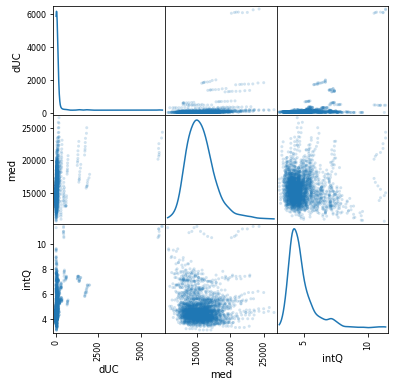

<Figure size 432x288 with 0 Axes>

In [4]:
### Calculating correlation between metropolisation indices for ZE1990 data


X = pd.DataFrame(index = pd.MultiIndex.from_product([area_ZE1990.index,range(2001,2009)]))
## X = X.drop(4111)

X["index"] = X.index

X["dUC"] = X["index"].map(lambda x: dUC_timeseries_ZE1990[x[0]].loc[x[1]])
X["med"] = X["index"].map(lambda x: med_timeseries_ZE1990[x[0]].loc[x[1]])
X["intQ"] = X["index"].map(lambda x: intQ_timeseries_ZE1990[x[0]].loc[x[1]])

## X = X.set_index(["index"])
## X = X.drop("index", axis=1)


    ## Plotting correlation matrix
print(X.applymap(lambda x: np.log(x)).corr())

    ## Plotting scatter matrix
fig = plt.figure()

scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='kde')

plt.show()
plt.savefig("scattermatrix_ZE1990")

           dUC       med      intQ
dUC   1.000000  0.361173  0.411585
med   0.361173  1.000000 -0.164670
intQ  0.411585 -0.164670  1.000000


<Figure size 432x288 with 0 Axes>

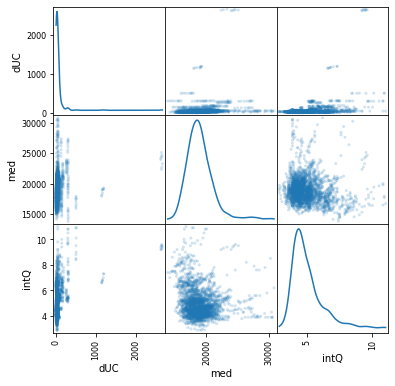

<Figure size 432x288 with 0 Axes>

In [5]:
### Calculating correlation between metropolisation indices for ZE2010 data

X = pd.DataFrame(index = pd.MultiIndex.from_product([area_ZE2010.index,range(2009,2017)]))
## X = X.drop(4111)

X["index"] = X.index

X["dUC"] = X["index"].map(lambda x: dUC_timeseries_ZE2010[x[0]].loc[x[1]])
X["med"] = X["index"].map(lambda x: med_timeseries_ZE2010[x[0]].loc[x[1]])
X["intQ"] = X["index"].map(lambda x: intQ_timeseries_ZE2010[x[0]].loc[x[1]])

## X = X.set_index(["index"])
## X = X.drop("index", axis=1)


    ## Plotting correlation matrix
print(X.applymap(lambda x: np.log(x)).corr())

    ## Plotting scatter matrix

fig = plt.figure()

scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='kde')

plt.show()
plt.savefig("scattermatrix_ZE2010")

In [6]:
### Defining top d9 vs bottom d1 extraction

D1D9_number = 25 ## number of top/bottom ZE considered

def extract_D1D9_timeseries(sort_timeseries, d1_timeseries, d9_timeseries, number):
    
    D1D9_timeseries = pd.DataFrame(index=pd.MultiIndex.from_product([sort_timeseries.columns,sort_timeseries.index]))

    D1D9_timeseries["Sort"] = D1D9_timeseries.index
    D1D9_timeseries["Sort"] = D1D9_timeseries["Sort"].apply(lambda x: sort_timeseries.loc[x[1],x[0]])

    D1D9_timeseries["d1"] = D1D9_timeseries.index
    D1D9_timeseries["d1"] = D1D9_timeseries["d1"].apply(lambda x: d1_timeseries.loc[x[1],x[0]])

    D1D9_timeseries["d9"] = D1D9_timeseries.index
    D1D9_timeseries["d9"] = D1D9_timeseries["d9"].apply(lambda x: d9_timeseries.loc[x[1],x[0]])
    
    bottom_index = D1D9_timeseries.groupby(level=0).mean().nsmallest(number,"Sort").index
    top_index = D1D9_timeseries.groupby(level=0).mean().nlargest(number,"Sort").index

    D1_timeseries = D1D9_timeseries.loc[bottom_index]["d1"]
    D1_timeseries = D1_timeseries.reset_index()
    D1_timeseries = D1_timeseries.pivot(columns="level_0", index="level_1", values="d1")
    D1_timeseries = D1_timeseries.sort_index(axis=1)

    D9_timeseries = D1D9_timeseries.loc[top_index]["d9"]
    D9_timeseries = D9_timeseries.reset_index()
    D9_timeseries = D9_timeseries.pivot(columns="level_0", index="level_1", values="d9")
    D9_timeseries = D9_timeseries.sort_index(axis=1)
    
    return(D1_timeseries, D9_timeseries)

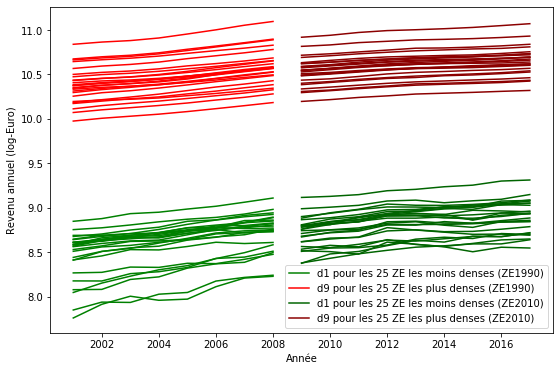

In [7]:
### Plotting urban ZE d1 versus rural ZE d9

[D1plot_ZE1990, D9plot_ZE1990] = extract_D1D9_timeseries(dUC_timeseries_ZE1990, d1_timeseries_ZE1990, d9_timeseries_ZE1990, D1D9_number)
[D1plot_ZE2010, D9plot_ZE2010] = extract_D1D9_timeseries(dUC_timeseries_ZE2010, d1_timeseries_ZE2010, d9_timeseries_ZE2010, D1D9_number)

fig = plt.figure(figsize=(9,6))
plt.plot(np.log(D1plot_ZE1990), color="green", label="d1 pour les " + str(D1D9_number) + " ZE les moins denses (ZE1990)")
plt.plot(np.log(D9plot_ZE1990), color="red", label="d9 pour les " + str(D1D9_number) + " ZE les plus denses (ZE1990)")
plt.plot(np.log(D1plot_ZE2010), color="darkgreen", label="d1 pour les " + str(D1D9_number) + " ZE les moins denses (ZE2010)")
plt.plot(np.log(D9plot_ZE2010), color="darkred", label="d9 pour les " + str(D1D9_number) + " ZE les plus denses (ZE2010)")
plt.xlabel("Année")
plt.ylabel("Revenu annuel (log-Euro)")

handles, labels = plt.gca().get_legend_handles_labels()
i =1
while i<len(labels):
    if labels[i] in labels[:i]:
        del(labels[i])
        del(handles[i])
    else:
        i +=1
plt.legend(handles, labels)

plt.show()
fig.savefig("Urban ZE d9 vs rural ZE d1 plot.png")

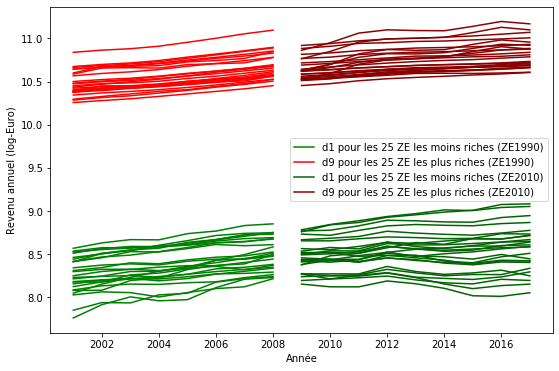

In [8]:
### Plotting richer ZE d1 versus poorer ZE d9

[D1plot_ZE1990, D9plot_ZE1990] = extract_D1D9_timeseries(med_timeseries_ZE1990, d1_timeseries_ZE1990, d9_timeseries_ZE1990, D1D9_number)
[D1plot_ZE2010, D9plot_ZE2010] = extract_D1D9_timeseries(med_timeseries_ZE2010, d1_timeseries_ZE2010, d9_timeseries_ZE2010, D1D9_number)

fig = plt.figure(figsize=(9,6))
plt.plot(np.log(D1plot_ZE1990), color="green", label="d1 pour les " + str(D1D9_number) + " ZE les moins riches (ZE1990)")
plt.plot(np.log(D9plot_ZE1990), color="red", label="d9 pour les " + str(D1D9_number) + " ZE les plus riches (ZE1990)")
plt.plot(np.log(D1plot_ZE2010), color="darkgreen", label="d1 pour les " + str(D1D9_number) + " ZE les moins riches (ZE2010)")
plt.plot(np.log(D9plot_ZE2010), color="darkred", label="d9 pour les " + str(D1D9_number) + " ZE les plus riches (ZE2010)")
plt.xlabel("Année")
plt.ylabel("Revenu annuel (log-Euro)")

handles, labels = plt.gca().get_legend_handles_labels()
i =1
while i<len(labels):
    if labels[i] in labels[:i]:
        del(labels[i])
        del(handles[i])
    else:
        i +=1
plt.legend(handles, labels)

plt.show()
fig.savefig("Richer ZE d9 vs poorer ZE d1 plot.png")

In [9]:
### Defining Foster-Wolfson polarisation function ###

def FWpol(nUC_timeseries, moy_timeseries):
    
    FWpol = (nUC_timeseries*moy_timeseries).sum(axis=1)
    FWpol = FWpol/nUC_timeseries.sum(axis=1)
    FWpol = FWpol/moy_timeseries.median(axis=1)
    
    return(FWpol)

In [10]:
### Defining Esteban-Ray polarisation function ###

def ERpol(nUC_timeseries, moy_timeseries, alpha):
    
    dp = nUC_timeseries.apply(lambda x: x/x.sum(), axis=1)
    dp = dp.apply(lambda x: np.outer(x**(1+alpha),x), axis=1)

    dx = moy_timeseries.apply(lambda x: np.outer(x, 1/x), axis=1)
    dx = dx.apply(lambda y : np.abs(np.log(y)))

    ERpol = (dp*dx).apply(lambda x: x.sum())
    ERpol = ERpol*len(moy_timeseries.columns)**alpha

    return(ERpol)

In [11]:
### Defining top d9 vs bottom d1 polarisation

def D1D9pol(sort_timeseries, d1_timeseries, d9_timeseries, number):
   
    [D1plot, D9plot] = extract_D1D9_timeseries(sort_timeseries, d1_timeseries, d9_timeseries, number)
    D1D9pol = np.log(D9plot).mean(axis=1) - np.log(D1plot).mean(axis=1)
    
    return(D1D9pol)

In [12]:
### Defining adapted Foster-Wolfson top d9 vs bottom d1 polarisation

def FWD1D9pol(nUC_timeseries, d1_timeseries, d9_timeseries):
   
    D1D9pol = FWpol(nUC_timeseries, pd.concat([d1_timeseries, d9_timeseries], axis=1))
    
    return(D1D9pol)

In [13]:
P_table = pd.DataFrame(columns=pd.MultiIndex.from_product([["Top D9 versus bottom D1", "Foster-Wolfson", "Foster-Wolfson (D9 versus D1)", "Esteban-Ray (alpha = 0)", "Esteban-Ray (alpha = 1)"], ["Indice", "Taux de variation"]], names=["Type", "Value"]))


P_table["Top D9 versus bottom D1", "Indice"] = pd.concat([D1D9pol(med_timeseries_ZE1990, d1_timeseries_ZE1990, d9_timeseries_ZE1990, D1D9_number), D1D9pol(med_timeseries_ZE2010, d1_timeseries_ZE2010, d9_timeseries_ZE2010, D1D9_number)])
P_table["Foster-Wolfson", "Indice"] = FWpol(nUC_timeseries_ZE1990, moy_timeseries_ZE1990)
P_table["Foster-Wolfson (D9 versus D1)", "Indice"] = pd.concat([FWD1D9pol(nUC_timeseries_ZE1990, d1_timeseries_ZE1990, d9_timeseries_ZE1990), FWD1D9pol(nUC_timeseries_ZE2010, d1_timeseries_ZE2010, d9_timeseries_ZE2010)])

P_table["Esteban-Ray (alpha = 0)", "Indice"] = ERpol(nUC_timeseries_ZE1990, moy_timeseries_ZE1990, 0)
P_table["Esteban-Ray (alpha = 1)", "Indice"] = ERpol(nUC_timeseries_ZE1990, moy_timeseries_ZE1990, 1)
    
P_table.loc(axis=1)[:, "Taux de variation"] = P_table.loc(axis=1)[:, "Indice"].apply(lambda x: -np.log(x.dropna())).diff(-1).values


with open("Polarisation table.csv","w") as f:
    f.write(P_table.round(5).to_csv())

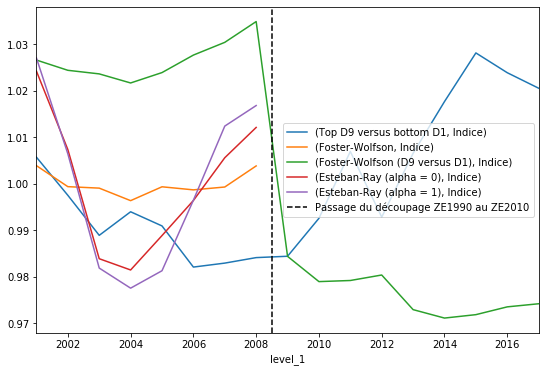

In [14]:
def normalised_plot(df):
    (df/df.mean()).plot()
    return()

fig = plt.figure(figsize=(9,6))

normalised_plot(P_table["Top D9 versus bottom D1", "Indice"])
normalised_plot(P_table["Foster-Wolfson", "Indice"])
normalised_plot(P_table["Foster-Wolfson (D9 versus D1)", "Indice"])
normalised_plot(P_table["Esteban-Ray (alpha = 0)", "Indice"])
normalised_plot(P_table["Esteban-Ray (alpha = 1)", "Indice"])

plt.axvline(x=2008.5, linestyle="--", color="black", label="Passage du découpage ZE1990 au ZE2010")

handles, labels = plt.gca().get_legend_handles_labels()
i =1
while i<len(labels):
    if labels[i] in labels[:i]:
        del(labels[i])
        del(handles[i])
    else:
        i +=1
plt.legend(handles, labels)

fig.savefig("polarisation plot.png")
plt.show()

In [15]:
P_table

Type    Top D9 versus bottom D1                   Foster-Wolfson  \
Value                    Indice Taux de variation         Indice   
level_1                                                            
2001                   2.218756         -0.008185       1.118058   
2002                   2.200669         -0.008679       1.113026   
2003                   2.181653          0.005118       1.112672   
2004                   2.192846         -0.003071       1.109669   
2005                   2.186122         -0.008980       1.112992   
2006                   2.166578          0.000870       1.112258   
2007                   2.168463          0.001204       1.112939   
2008                   2.171075          0.000296       1.117994   
2009                   2.171718          0.008268            NaN   
2010                   2.189748          0.014390            NaN   
2011                   2.221487         -0.014135            NaN   
2012                   2.190306          0.013746            NaN   
2013                   2.220622          0.010999            NaN   
2014                   2.245182          0.010242            NaN   
2015                   2.268295         -0.004153            NaN   
2016                   2.258895         -0.003266            NaN   
2017                   2.251530               NaN            NaN   

Type                      Foster-Wolfson (D9 versus D1)                    \
Value   Taux de variation                        Indice Taux de variation   
level_1                                                                     
2001            -0.004511                      2.285368         -0.002151   
2002            -0.000318                      2.280457         -0.000754   
2003            -0.002702                      2.278738         -0.001911   
2004             0.002990                      2.274387          0.002186   
2005            -0.000660                      2.279365          0.003672   
2006             0.000613                      2.287751          0.002664   
2007             0.004531                      2.293854          0.004334   
2008                  NaN                      2.303818         -0.050079   
2009                  NaN                      2.191286         -0.005537   
2010                  NaN                      2.179186          0.000243   
2011                  NaN                      2.179717          0.001207   
2012                  NaN                      2.182350         -0.007633   
2013                  NaN                      2.165755         -0.001869   
2014                  NaN                      2.161711          0.000757   
2015                  NaN                      2.163349          0.001725   
2016                  NaN                      2.167083          0.000687   
2017                  NaN                      2.168572               NaN   

Type    Esteban-Ray (alpha = 0)                   Esteban-Ray (alpha = 1)  \
Value                    Indice Taux de variation                  Indice   
level_1                                                                     
2001                   0.176880         -0.016612                0.697426   
2002                   0.173966         -0.023604                0.683426   
2003                   0.169907         -0.002467                0.666721   
2004                   0.169489          0.007516                0.663784   
2005                   0.170767          0.007608                0.666331   
2006                   0.172071          0.009200                0.676640   
2007                   0.173662          0.006463                0.687477   
2008                   0.174788               NaN                0.690481   
2009                        NaN               NaN                     NaN   
2010                        NaN               NaN                     NaN   
2011                        NaN               NaN                     NaN   
2012                